<a href="https://colab.research.google.com/github/Zangetsu112/Cats-Dogs-ClassifierCNN/blob/main/CatsDogsKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='relu'))

from tensorflow.keras import optimizers
model.compile(loss="binary_crossentropy", 
                optimizer=optimizers.RMSprop(learning_rate=1e-4), 
                metrics=['accuracy'])



In [2]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        "/content/drive/MyDrive/cats-and-dogs/train",
        target_size=(150, 150),
        batch_size=20, 
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        "/content/drive/MyDrive/cats-and-dogs/validation", 
        target_size=(150, 150),
        batch_size=20, 
        class_mode='binary')


Found 2030 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [3]:
history = model.fit(
        train_generator, 
        steps_per_epoch=100, 
        epochs=30, 
        validation_data=validation_generator, 
        validation_steps=50)

model.save('/content/drive/MyDrive/cats-and-dogs/cats-and-dogs-scratch.h5')

Epoch 1/30
100/100 [==============================] - 358s 3s/step - loss: 7.7822 - accuracy: 0.4955 - val_loss: 5.2753 - val_accuracy: 0.6580
Epoch 2/30
100/100 [==============================] - 154s 2s/step - loss: 7.7357 - accuracy: 0.4985 - val_loss: 5.0440 - val_accuracy: 0.6730
Epoch 3/30
100/100 [==============================] - 121s 1s/step - loss: 7.7822 - accuracy: 0.4955 - val_loss: 5.2599 - val_accuracy: 0.6590
Epoch 4/30
100/100 [==============================] - 114s 1s/step - loss: 7.7822 - accuracy: 0.4955 - val_loss: 5.2136 - val_accuracy: 0.6620
Epoch 5/30
100/100 [==============================] - 110s 1s/step - loss: 7.7435 - accuracy: 0.4980 - val_loss: 5.1674 - val_accuracy: 0.6650
Epoch 6/30
100/100 [==============================] - 112s 1s/step - loss: 7.7822 - accuracy: 0.4955 - val_loss: 4.8897 - val_accuracy: 0.6830
Epoch 7/30
100/100 [==============================] - 109s 1s/step - loss: 7.7435 - accuracy: 0.4980 - val_loss: 5.0285 - val_accuracy: 0.6740

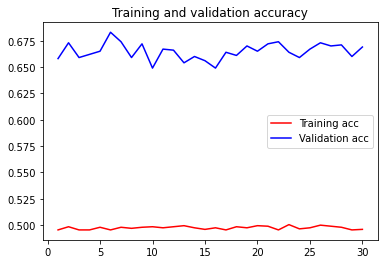

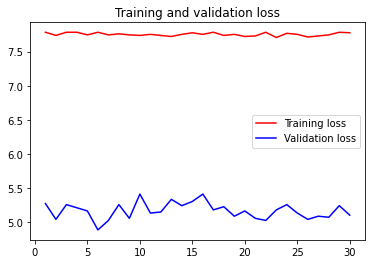

In [5]:
import matplotlib.pyplot as plt 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = [x for x in range(1, len(acc) + 1)]

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()